In [1]:
# pip install scikit-learn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import nltk

In [3]:
# # Download Packages
# nltk.download('stopwords')
# nltk.download('punkt')
# nltk.download('wordnet')

In [4]:
# To load tsv file

df = pd.read_csv('Restaurant_Reviews.tsv', delimiter = '\t') 
# \t means tab means default space  by 5 characters

df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [5]:
df.isnull().sum()

Review    0
Liked     0
dtype: int64

In [6]:
# Create WordCloud
from wordcloud import WordCloud, STOPWORDS

In [7]:
df[df['Liked']==1]

,Review,Liked
0,Wow... Loved this place.,1
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
8,The fries were great too.,1
9,A great touch.,1
...,...,...
899,"Overall, a great experience.",1
901,Their regular toasted bread was equally satisf...,1
907,The chips and sals a here is amazing!!!!!!!!!!...,1
909,This is my new fav Vegas buffet spot.,1


In [8]:
# Create WordCloud for +ve review  means 1
# 1st join all +ve review for all +ve like 1 and convert it into paragraph
# then create a WordCloud. 

w = ''.join(df[df['Liked']==1]['Review'])



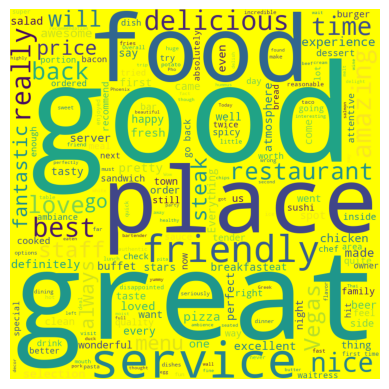

In [9]:
# Create an object of WordCloud class and passing the following parameters 
wc = WordCloud(width = 800, height = 800, background_color = 'yellow',
               stopwords = STOPWORDS, min_font_size = 10
               )

# create a WordCloud
wc.generate(w)
plt.imshow(wc)
plt.axis('off')
plt.show()

Similarly Create WordCloud for -ve reviews

In [10]:
df[df['Liked']==0]

,Review,Liked
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
5,Now I am getting angry and I want my damn pho.,0
6,Honeslty it didn't taste THAT fresh.),0
7,The potatoes were like rubber and you could te...,0
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [11]:
# Create WordCloud for +ve review  means 1
# 1st join all +ve review for all +ve like 1 and convert it into paragraph
# then create a WordCloud. 

w = ''.join(df[df['Liked']==0]['Review'])

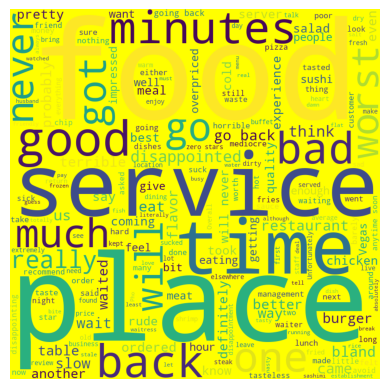

In [12]:
# Create an object of WordCloud class and passing the following parameters 
wc = WordCloud(width = 800, height = 800, background_color = 'yellow',
               stopwords = STOPWORDS, min_font_size = 10
               )

# create a WordCloud
wc.generate(w)
plt.imshow(wc)
plt.axis('off')
plt.show()

In [13]:
# Replacing values in 'Liked' column , 1 with 'Positive Review ' & 0 'Negative Review'

df = df.replace(1, 'Positive Review')
df = df.replace(0, 'Negative Review')

In [14]:
df.head()

,Review,Liked
0,Wow... Loved this place.,Positive Review
1,Crust is not good.,Negative Review
2,Not tasty and the texture was just nasty.,Negative Review
3,Stopped by during the late May bank holiday of...,Positive Review
4,The selection on the menu was great and so wer...,Positive Review


In [15]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [16]:
# Now Cleaning the data means text preprocessing/ text mining
# create a user defined function

def clean_text(review):
    # first convert given text(review) in lower case, using inbuilt function lower()
    review = review.lower()
    # 2nd setp: apply tokenizer on given review
    tokens = word_tokenize(review)
    # 3rd step: only retrive alphabets from given review and remove all numbers and special characters 
    # from given review
    review = [w for w in tokens if w.isalpha()]

    # Next remove all stopwords in given review
    # create an object of StopWords class
    stop = stopwords.words('english')
    review = [w for w in review if w not in stop]

    # Lemmatization
    # Create the object of WordNetLemmatizer class

    lemma = WordNetLemmatizer()
    review = [lemma.lemmatize(w) for w in review]

    return ' '.join(review)

In [17]:
# Call function
df['Review'] = df['Review'].apply(clean_text)

In [18]:
df['Review'].head()

0                                      wow loved place
1                                           crust good
2                                  tasty texture nasty
3    stopped late may bank holiday rick steve recom...
4                           selection menu great price
Name: Review, dtype: object

In [19]:
df.dtypes

Review    object
Liked     object
dtype: object

In [20]:
X = df['Review']  # input
Y = df['Liked']    # output 1D


In [21]:
# apply CountVectorizer toi convert object type paragraph(Review) into number

from sklearn.feature_extraction.text import CountVectorizer
# create object of CountVertorizer class
cv = CountVectorizer()
X = cv.fit_transform(X)

In [22]:
X = X.toarray()
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [23]:
X.ndim

2

In [24]:
X.dtype

dtype('int64')

In [25]:
type(X)

numpy.ndarray

In [26]:
# To show the features
cv.get_feature_names_out()

array(['absolute', 'absolutely', 'absolutley', ..., 'yum', 'yummy',
       'zero'], dtype=object)

In [27]:
# train_test_split  in 70% and 30%
from sklearn.model_selection import train_test_split

In [28]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3, random_state = 1)


In [29]:
# Generation classification report
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [30]:
# Classification algorithm

def create_model(model):
    model.fit(X_train,Y_train)
    Y_pred = model.predict(X_test)
    # generate report
    print(classification_report(Y_test,Y_pred))
    print(confusion_matrix(Y_test, Y_pred))
    return model

In [31]:
#model perform with Logistic regression class
from sklearn.linear_model import LogisticRegression

In [32]:
# create an object of LogisticRegression class
lr=LogisticRegression()

In [33]:
# call function
lr=create_model(lr)

                 precision    recall  f1-score   support

Negative Review       0.76      0.73      0.75       161
Positive Review       0.70      0.74      0.72       139

       accuracy                           0.73       300
      macro avg       0.73      0.73      0.73       300
   weighted avg       0.74      0.73      0.73       300

[[117  44]
 [ 36 103]]


In [34]:
#perform dataset with the help of DecisionTreeClassifier 
#call DecisionTreeClassifier class
from sklearn.tree import DecisionTreeClassifier

In [35]:
#create the object of DecisionTreeClassifier class
dt=DecisionTreeClassifier() #by default Gini index 
#means find loss : 1-P*2-Q*2

In [36]:
dt = create_model(dt)

                 precision    recall  f1-score   support

Negative Review       0.70      0.73      0.72       161
Positive Review       0.67      0.65      0.66       139

       accuracy                           0.69       300
      macro avg       0.69      0.69      0.69       300
   weighted avg       0.69      0.69      0.69       300

[[117  44]
 [ 49  90]]


## We will use Streamlit library for ML Algorithm deployment
We Also use flaskframework

In [37]:
# Features of Streamlit
# 1. Easy to use and very fast tot work with this frame work
# It is very powerfull

In [38]:
# Deploy ML model

In [39]:
df.head()

,Review,Liked
0,wow loved place,Positive Review
1,crust good,Negative Review
2,tasty texture nasty,Negative Review
3,stopped late may bank holiday rick steve recom...,Positive Review
4,selection menu great price,Positive Review


In [40]:
# Liked = 1 means +ve Review
# and     0 means _ve review

In [41]:
# Steps to save model

In [42]:
import pickle

In [43]:
file1 = open("model.pkl",'wb')   # Open file in write binary format
file2 = open("CountVector.pkl",'wb')

# here file1 and file2 are temporary file

In [44]:
pickle.dump(dt,file1)  # here dt is an object of DecisionTreeClassifier() class
# It is used to save object of DecisionTreeClassifier() in file1

pickle.dump(cv,file2)
# It is used to save object of CountVectorizer() in file

In [45]:
file1.close()
file2.close()

In [46]:
# Testing the model

# model.predict(msg)

# We get an error at this setp because the msg in data in cv is stored in numerical format 
# hence we have to give the msg 1st to cv- file2 inoder to convert that msg into numerical format
#and the that message is passed to is model- file1

# 1 means +ve review
# 0 means _ve review

# Make a dummy message
msg = 'It was amazing. I liked it a lot'

msg_cv = cv.transform([msg])
dt.predict(msg_cv)

array(['Positive Review'], dtype=object)